In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:

import os
import numpy as np

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [121]:
#dataset cargado para ver las ventas de videojuegos y calificacaciones
data = np.loadtxt('/content/drive/MyDrive/laboratorio1/dataset_10.csv', delimiter=';')
X, y = data[:, :6], data[:,6]
m = y.size

In [122]:
print(X)
print(y)
print(X.shape)
print(y.shape)

[[1.0000e+00 2.0060e+03 4.1490e+01 2.9020e+01 3.7700e+00 8.4600e+00]
 [2.0000e+00 1.9850e+03 2.9080e+01 3.5800e+00 6.8100e+00 7.7000e-01]
 [3.0000e+00 2.0080e+03 1.5850e+01 1.2880e+01 3.7900e+00 3.3100e+00]
 ...
 [1.6598e+04 2.0080e+03 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.6599e+04 2.0100e+03 0.0000e+00 1.0000e-02 0.0000e+00 0.0000e+00]
 [1.6600e+04 2.0030e+03 1.0000e-02 0.0000e+00 0.0000e+00 0.0000e+00]]
[8.274e+01 4.024e+01 3.582e+01 ... 1.000e-02 1.000e-02 1.000e-02]
(16598, 6)
(16598,)


In [123]:
#nomrlizando a una misma escala para usarse
def normalizarCaracteristicas(X):
    X_norm = X.copy()

    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)

    sigma = np.std(X, axis=0)

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [124]:

X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.0000e+00 2.0060e+03 4.1490e+01 2.9020e+01 3.7700e+00 8.4600e+00]
 [2.0000e+00 1.9850e+03 2.9080e+01 3.5800e+00 6.8100e+00 7.7000e-01]
 [3.0000e+00 2.0080e+03 1.5850e+01 1.2880e+01 3.7900e+00 3.3100e+00]
 ...
 [1.6598e+04 2.0080e+03 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.6599e+04 2.0100e+03 0.0000e+00 1.0000e-02 0.0000e+00 0.0000e+00]
 [1.6600e+04 2.0030e+03 1.0000e-02 0.0000e+00 0.0000e+00 0.0000e+00]]
Media calculada: [8.30060525e+03 2.00597530e+03 2.64667430e-01 1.46652006e-01
 7.77816604e-02 4.80630196e-02]
Desviación estandar calculada: [4.79170958e+03 6.67977126e+00 8.16658427e-01 5.05336008e-01
 3.09281331e-01 1.88582722e-01]
[[-1.73207602e+00  3.69799659e-03  5.04805084e+01  5.71369298e+01
   1.19380576e+01  4.46060853e+01]
 [-1.73186733e+00 -3.14012223e+00  3.52844367e+01  6.79418830e+00
   2.17672962e+01  3.82822442e+00]
 [-1.73165863e+00  3.03109447e-01  1.90842732e+01  2.51977848e+01
   1.20027236e+01  1.72971148e+01]
 ...
 [ 1.73161470e+00  3.03109447e-01 -3.2

In [125]:
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()

    pyplot.plot(x, y, 'ro')
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)


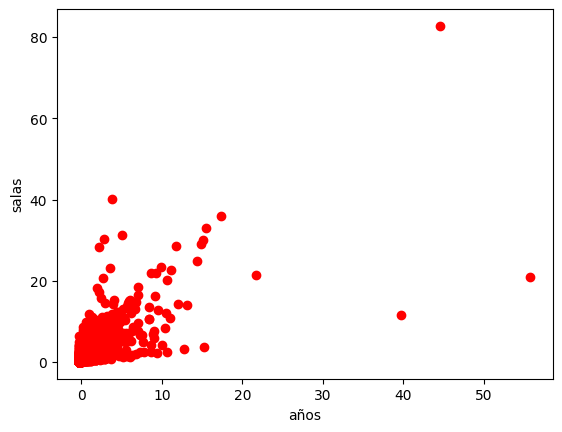

In [126]:
#usando 2 de las colunma de anos y salas para una representar una grafica
xlabel1 = "años"
ylabel1 = "salas"
graficarDatos(X_norm[:, 5], y, xlabel1, ylabel1)


In [127]:
print(X_norm)

[[-1.73207602e+00  3.69799659e-03  5.04805084e+01  5.71369298e+01
   1.19380576e+01  4.46060853e+01]
 [-1.73186733e+00 -3.14012223e+00  3.52844367e+01  6.79418830e+00
   2.17672962e+01  3.82822442e+00]
 [-1.73165863e+00  3.03109447e-01  1.90842732e+01  2.51977848e+01
   1.20027236e+01  1.72971148e+01]
 ...
 [ 1.73161470e+00  3.03109447e-01 -3.24085837e-01 -2.90206920e-01
  -2.51491612e-01 -2.54864386e-01]
 [ 1.73182339e+00  6.02520897e-01 -3.24085837e-01 -2.70418106e-01
  -2.51491612e-01 -2.54864386e-01]
 [ 1.73203209e+00 -4.45419179e-01 -3.11840815e-01 -2.90206920e-01
  -2.51491612e-01 -2.54864386e-01]]


In [128]:
#agregando una columna de unos a X para determinar el  sesgo,
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [129]:
print(X_ready)

[[ 1.00000000e+00 -1.73207602e+00  3.69799659e-03 ...  5.71369298e+01
   1.19380576e+01  4.46060853e+01]
 [ 1.00000000e+00 -1.73186733e+00 -3.14012223e+00 ...  6.79418830e+00
   2.17672962e+01  3.82822442e+00]
 [ 1.00000000e+00 -1.73165863e+00  3.03109447e-01 ...  2.51977848e+01
   1.20027236e+01  1.72971148e+01]
 ...
 [ 1.00000000e+00  1.73161470e+00  3.03109447e-01 ... -2.90206920e-01
  -2.51491612e-01 -2.54864386e-01]
 [ 1.00000000e+00  1.73182339e+00  6.02520897e-01 ... -2.70418106e-01
  -2.51491612e-01 -2.54864386e-01]
 [ 1.00000000e+00  1.73203209e+00 -4.45419179e-01 ... -2.90206920e-01
  -2.51491612e-01 -2.54864386e-01]]


In [130]:
# usare la funcion del costo con el metodo Mean Squared Error
# para ver cuan serca estan mis predicciones de regresion
# con las y realeas en este caso Y= ventas globales
def calcularCosto(X, y, theta):

    m = y.size

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [131]:
theta=np.array([0.1, 0.1, 0.1, 0.1, 0.1 , 0.1 , 0.1])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 0.1 0.1 0.1 0.1 0.1 0.1] se obtiene un costo de: 0.9309862298143052


In [132]:
# utilizando la funcion de la gradiente para hallar thetas ajustados
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):

    m = y.shape[0]

    theta = theta.copy()

    J_historico = []


    for i in range(numero_iteraciones):

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)


        J_actual = calcularCosto(X, y, theta)


        J_historico.append(J_actual)


    return theta, J_historico


los valores de theta calculados son: [ 5.37440656e-01  3.92127860e-04 -8.02048431e-05  8.16682994e-01
  5.05380681e-01  3.09272091e-01  1.88547614e-01]
con un costo de: 1.3569563177537864e-05 


Text(0, 0.5, 'Costo J')

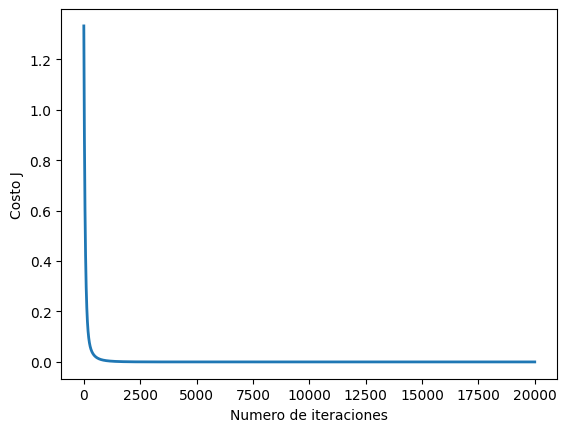

In [133]:
# calculamos las mejores parametros de theta
theta = np.zeros(7)

num_ite = 20000
alpha = 0.003



theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")


print(f"con un costo de: { J_historico[-1]} ")




pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

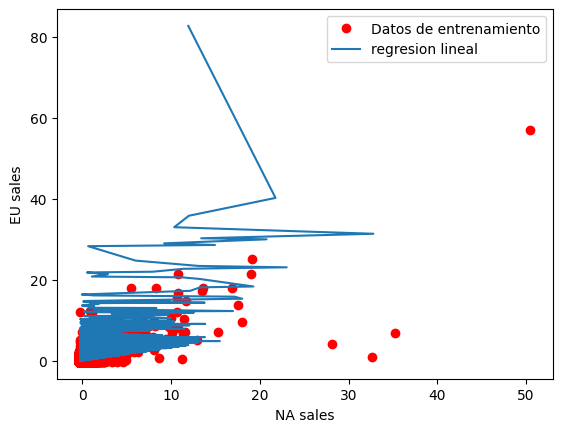

In [134]:

xlabel1 = "NA sales"
ylabel1 = "EU sales"
graficarDatos(X_ready[:, 3], X_ready[:, 4], xlabel1, ylabel1)

pyplot.plot(X_ready[:, 5], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [135]:
X_ready.shape


(16598, 7)

In [136]:
# 1 prediccion de 10 que devemos realizar para nuestras ventas globales
# usaremos 10 primeras filas del data set
y_pred = np.dot([1, 1 , 2006, 41.49, 29.02 ,3.77 , 8.46], theta)
print(y_pred)

51.68833523878307


In [137]:
 # 2 ejemplo
y_pred = np.dot([1, 2 , 1985,29.08,3.58,6.81,0.77], theta)
print(y_pred)


28.188747194511574


In [138]:
# 3 ejemplo
y_pred = np.dot([1,3,2008,15.85,12.88,3.79,3.31], theta)
print(y_pred)

21.627528162661612


In [139]:
# 4 ejemplo
y_pred = np.dot([1,4, 2009,15.75,11.01,3.28,2.96], theta)
print(y_pred)

20.377389481718307


In [140]:
# 5 ejemplo
y_pred = np.dot([1,5,1996,11.27,8.89,10.22,1], theta)
print(y_pred)

17.425472402150607


In [141]:
# 6 ejemplo
y_pred = np.dot([1,6,1989,23.2,2.26,4.22,0.58], theta)
print(y_pred)

21.8839576228466


In [142]:
# 7 ejemplo
y_pred = np.dot([1,7,2006,11.38,9.23,6.5,2.9], theta)
print(y_pred)

16.894867460308827


In [143]:
# 8 ejemplo
y_pred = np.dot([1,8,2006,14.03,9.2,2.93,2.85], theta)
print(y_pred)

17.930779356674286


In [144]:
# 9 ejemplo
y_pred = np.dot([1,9,2009,14.59,7.06,4.7,2.26], theta)
print(y_pred)

17.74292719741287


In [145]:
# 10 ejemplo
y_pred = np.dot([1,10,1984,26.93,0.63,0.28,0.47], theta)
print(y_pred)

22.869111940410907


In [146]:
# utlizando la ecuaciion de la normal para un calculo mas presiso de mis ventas globales
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [147]:
# agrego el sesgo una ves mas para que el modelo aprenda los patrones de datos
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)


In [148]:
print(X_ren)

[[1.0000e+00 1.0000e+00 2.0060e+03 ... 2.9020e+01 3.7700e+00 8.4600e+00]
 [1.0000e+00 2.0000e+00 1.9850e+03 ... 3.5800e+00 6.8100e+00 7.7000e-01]
 [1.0000e+00 3.0000e+00 2.0080e+03 ... 1.2880e+01 3.7900e+00 3.3100e+00]
 ...
 [1.0000e+00 1.6598e+04 2.0080e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.6599e+04 2.0100e+03 ... 1.0000e-02 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.6600e+04 2.0030e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [149]:
# usando el sesgo  para predecir y parametros de theta
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [ 2.36684309e-02  8.18355760e-08 -1.20045543e-05  1.00003029e+00
  1.00008787e+00  9.99970177e-01  9.99814382e-01]


In [150]:
# 1 prediccion de 10 que devemos realizar para nuestras ventas globales
# usaremos 10 primeras filas del data set
y_pred = np.dot([1, 1 , 2006, 41.49, 29.02 ,3.77 , 8.46], theta)
print(y_pred)

82.74171149744843


In [151]:
# 2 ejemplo
y_pred = np.dot([1, 2 , 1985,29.08,3.58,6.81,0.77], theta)
print(y_pred)

40.240689027607196


In [152]:
# 3 ejemplo
y_pred = np.dot([1,3,2008,15.85,12.88,3.79,3.31], theta)
print(y_pred)

35.83044803429075


In [153]:
# 4 ejemplo
y_pred = np.dot([1,4, 2009,15.75,11.01,3.28,2.96], theta)
print(y_pred)

33.000348938144896


In [154]:
# 5 ejemplo
y_pred = np.dot([1,5,1996,11.27,8.89,10.22,1], theta)
print(y_pred)

31.38033992122081


In [155]:
# 6 ejemplo
y_pred = np.dot([1,6,1989,23.2,2.26,4.22,0.58], theta)
print(y_pred)

30.26045973337782


In [156]:
# 7 ejemplo
y_pred = np.dot([1,7,2006,11.38,9.23,6.5,2.9], theta)
print(y_pred)

30.010011514945926


In [157]:
# 8 ejemplo
y_pred = np.dot([1,8,2006,14.03,9.2,2.93,2.85], theta)
print(y_pred)

29.01020498405162


In [158]:
# 9 ejemplo
y_pred = np.dot([1,9,2009,14.59,7.06,4.7,2.26], theta)
print(y_pred)

28.610054699139177


In [159]:
# 10 ejemplo    como se ve con la ecuacion de la normal mis ventas gloabales predichas
# son exatemente iguales a las propuestas
y_pred = np.dot([1,10,1984,26.93,0.63,0.28,0.47], theta)
print(y_pred)

28.310627763761975
